In [1]:
import numpy as np
import sklearn as sk
import os
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import pandas as pd
import requests
from io import StringIO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import ClusterCentroids
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.decomposition import TruncatedSVD

In [2]:
diabetes_df = pd.read_csv("diabetes.csv")
X = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=32,
                                                    stratify=y)

# standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8051948051948052

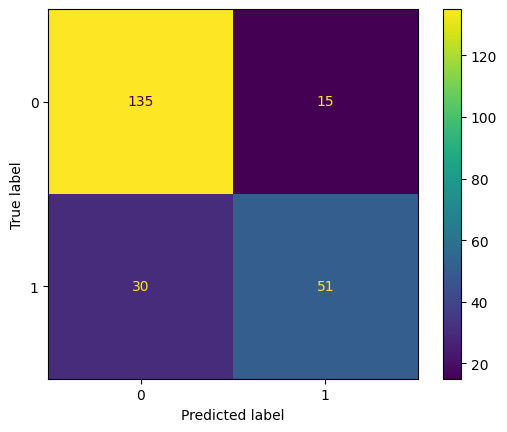

In [4]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [5]:
svd = TruncatedSVD(n_components=6)

X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.fit_transform(X_test)

model = LogisticRegression(random_state=32).fit(X_train_svd, y_train)

model.score(X_test_svd, y_test)

0.7402597402597403

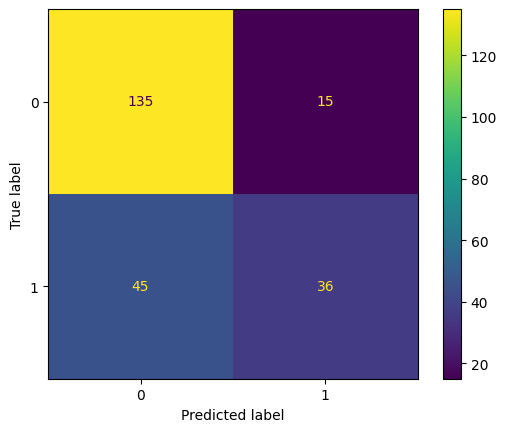

In [6]:
ConfusionMatrixDisplay.from_estimator(model, X_test_svd, y_test)

We can see that applying one dimensionality-reduction actually gives us a worse confusion matrix and overall testing results than if were to use another technique such as random forest classification.